In [77]:
import numpy as np
import pandas as pd

In [78]:
nr = pd.read_csv('new_read.csv', delimiter=';', header=None)
nr.columns = ['date','action','country','user_id','source','topic']
nr['date'] = pd.to_datetime(nr['date']).dt.date

In [79]:
nr.groupby(['source','country','user_id']).count().sort_values(by='source',ascending = 0)

date  action  topic
source  country   user_id                        
SEO     country_8 2458361235     1       1      1
        country_4 2458343326     1       1      1
                  2458344425     1       1      1
                  2458344354     1       1      1
                  2458344324     1       1      1
...                            ...     ...    ...
AdWords country_6 2458347491     1       1      1
                  2458347434     1       1      1
                  2458347431     1       1      1
                  2458347405     1       1      1
        country_1 2458151351     1       1      1

[210023 rows x 3 columns]

In [80]:
nr.groupby('country').count().user_id

country
country_1     5076
country_2    50675
country_3     2742
country_4    12751
country_5    40349
country_6    31156
country_7    51791
country_8    15483
Name: user_id, dtype: int64

In [81]:
buy = pd.read_csv('buy.csv', delimiter=';', header=None)
buy.columns = ['date','action','user_id','amount']
buy['date'] = pd.to_datetime(buy['date']).dt.date

In [56]:
buy

,date,action,user_id,amount
0,2018-01-01,buy,2458151555,8
1,2018-01-01,buy,2458151933,8
2,2018-01-01,buy,2458152245,8
3,2018-01-01,buy,2458152315,8
4,2018-01-01,buy,2458152371,8
...,...,...,...,...
8402,2018-03-30,buy,2458330984,80
8403,2018-03-30,buy,2458180092,8
8404,2018-03-30,buy,2458331539,80
8405,2018-03-30,buy,2458339835,80


In [82]:
nr.merge(buy, on = 'user_id') 

,date_x,action_x,country,user_id,source,topic,date_y,action_y,amount
0,2018-01-01,read,country_4,2458151279,SEO,North America,2018-01-04,buy,8
1,2018-01-01,read,country_4,2458151279,SEO,North America,2018-01-05,buy,80
2,2018-01-01,read,country_6,2458151323,SEO,Asia,2018-01-10,buy,8
3,2018-01-01,read,country_5,2458151349,Reddit,Asia,2018-02-24,buy,8
4,2018-01-01,read,country_5,2458151364,Reddit,Asia,2018-01-22,buy,8
...,...,...,...,...,...,...,...,...,...
8402,2018-03-25,read,country_7,2458346117,SEO,Asia,2018-03-28,buy,8
8403,2018-03-25,read,country_7,2458346133,AdWords,Asia,2018-03-29,buy,8
8404,2018-03-25,read,country_2,2458346159,AdWords,Asia,2018-03-29,buy,8
8405,2018-03-25,read,country_4,2458346179,AdWords,Europe,2018-03-28,buy,8


In [83]:
nr.merge(buy, on = 'user_id').groupby(['amount','source']).count()

date_x  action_x  country  user_id  topic  date_y  action_y
amount source                                                              
8      AdWords    1028      1028     1028     1028   1028    1028      1028
       Reddit     3090      3090     3090     3090   3090    3090      3090
       SEO        2522      2522     2522     2522   2522    2522      2522
80     AdWords     243       243      243      243    243     243       243
       Reddit      813       813      813      813    813     813       813
       SEO         711       711      711      711    711     711       711

In [70]:
nr.merge(buy, on = 'user_id').groupby(['amount','country']).count()

date_x  action_x  user_id  source  topic  date_y  action_y
amount country                                                              
8      country_1      25        25       25      25     25      25        25
       country_2    1441      1441     1441    1441   1441    1441      1441
       country_3     112       112      112     112    112     112       112
       country_4    1093      1093     1093    1093   1093    1093      1093
       country_5    1970      1970     1970    1970   1970    1970      1970
       country_6     534       534      534     534    534     534       534
       country_7    1380      1380     1380    1380   1380    1380      1380
       country_8      85        85       85      85     85      85        85
80     country_1       9         9        9       9      9       9         9
       country_2     350       350      350     350    350     350       350
       country_3      34        34       34      34     34      34        34
       country_4     309       309      309     309    309     309       309
       country_5     527       527      527     527    527     527       527
       country_6     152       152      152     152    152     152       152
       country_7     359       359      359     359    359     359       359
       country_8      27        27       27      27     27      27        27

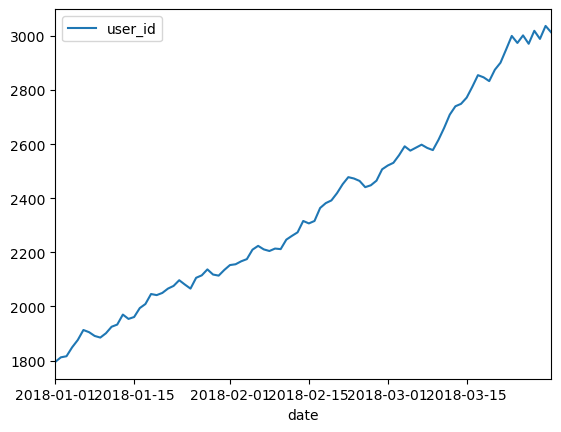

In [95]:
nr.groupby('date').count()[['user_id']].plot()

In [97]:
new = nr.groupby('date').count()[['user_id']]

In [100]:
okform = new.reset_index(drop = True).user_id

In [102]:
x = okform.index
y = okform.values

In [121]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

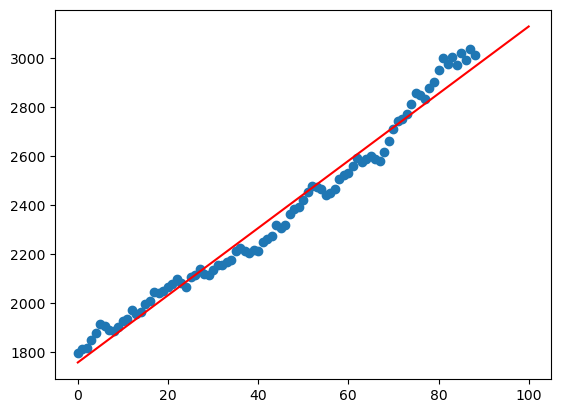

In [122]:
x_test = np.linspace(0, 100)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [123]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.9778173691382872

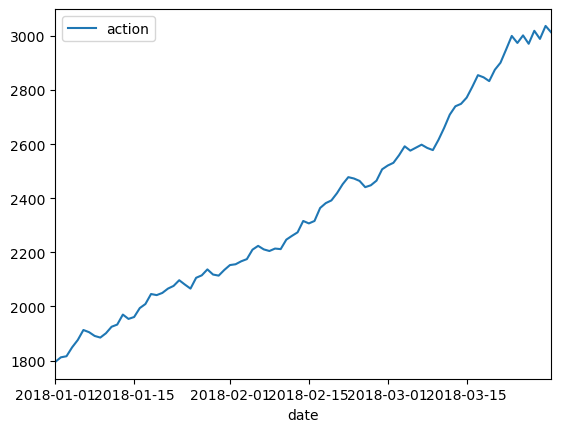

In [124]:
viz.plot()